In [1]:
import os
import csv

cwd = os.getcwd()
DATA_PATH = '/kik_knet_data'
ALL_DATA_PATH = f'{DATA_PATH}/all_data'
RAW_DATA_PATH = f'{ALL_DATA_PATH}/selecteddata'


attrs = [
    'origin_time', 'latitude', 'longitude', 'depth', 'magnitude',
    'station_code', 'station_latitude', 'station_longitude', 'station_height',
    'record_time', 'sampling_frequency', 'duration_time', 'channel_number',
    'scale_factor', 'max_acceleration', 'last_correction'
]
time_attrs = ['origin_time', 'record_time', 'duration_time', 'last_correction']

def get_file_data(file_path):
    result = {}
    line_number = 0
    strong_motion_data = []
    with open(file_path) as f:
        line = f.readline()
        while line:
            line = line.replace('\n', '')
            splitted_line = line.split(' ')
            if line_number <  len(attrs):
                attr = attrs[line_number]
                if attr in time_attrs:
                    result[attr] = f'{splitted_line[-2]} {splitted_line[-1]}'
                else:
                    result[attr] = f'{splitted_line[-1]}'
            elif ('Memo.' not in line) and line_number >= len(attr):
                for data in splitted_line:
                    if not data: continue
                    strong_motion_data.append(data)

            line = f.readline()
            line_number += 1
        result['strong_motion_data'] = strong_motion_data
        # result['strong_motion_data'] = strong_motion_data
    return result

def create_csv(path, fields, all_rows):
    with open(cwd + path, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fields)
        writer.writeheader()
        for data in all_rows:
            writer.writerow(data)

def create_csvs():
    all_rows = []
    strong_motion_data = []
    for path, directories, files in os.walk(cwd + RAW_DATA_PATH):
        for file in files:
            if 'ps' not in file:
                file_path = f'{path}/{file}'
                file_data = get_file_data(file_path)
                scale_factor = (file_data['scale_factor']).split('(gal)/')
                scale_factor = int(scale_factor[0])/int(scale_factor[1])
                strong_motion_data.append({
                    'strong_motion_data': file_data['strong_motion_data'],
                    'scale_factor': scale_factor
                })
                del file_data['strong_motion_data']
                all_rows.append(file_data)

    kik_knet_path = f'{ALL_DATA_PATH}/kik_knet.csv'
    create_csv(kik_knet_path, attrs, all_rows)

    strong_motion_path = f'{ALL_DATA_PATH}/kik_knet_strong_motion.csv'
    create_csv(
        strong_motion_path,
        ['strong_motion_data', 'scale_factor'],
        strong_motion_data
    )

# create_csvs()

In [2]:
import pandas as pd

def load_kiknet_data(csv_path):
    print(csv_path)
    return pd.read_csv(csv_path)

In [3]:
earthquake = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/kik_knet.csv')
earthquake.head()

/home/adebowale/code/proj/kik_knet_data/all_data/kik_knet.csv


,origin_time,latitude,longitude,depth,magnitude,station_code,station_latitude,station_longitude,station_height,record_time,sampling_frequency,duration_time,channel_number,scale_factor,max_acceleration,last_correction
0,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,E-W,3920(gal)/6182761,588.811,2007/03/25 09:41:51
1,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,N-S,3920(gal)/6182761,622.189,2007/03/25 09:41:51
2,2007/03/25 09:42:00,37.220,136.685,11,6.9,ISK004,37.3080,137.1471,9.0,2007/03/25 09:42:06,100Hz,205,U-D,3920(gal)/6182761,146.877,2007/03/25 09:41:51
3,2016/04/16 01:25:00,32.753,130.762,12,7.3,KMM009,32.6858,130.9856,443.0,2016/04/16 01:25:10,100Hz,300,E-W,3920(gal)/6182761,639.537,2016/04/16 01:25:10
4,2016/04/16 01:25:00,32.753,130.762,12,7.3,KMM009,32.6858,130.9856,443.0,2016/04/16 01:25:10,100Hz,300,U-D,3920(gal)/6182761,186.616,2016/04/16 01:25:10


In [4]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_time         660 non-null    object 
 1   latitude            660 non-null    float64
 2   longitude           660 non-null    float64
 3   depth               660 non-null    int64  
 4   magnitude           660 non-null    float64
 5   station_code        660 non-null    object 
 6   station_latitude    660 non-null    float64
 7   station_longitude   660 non-null    float64
 8   station_height      660 non-null    float64
 9   record_time         660 non-null    object 
 10  sampling_frequency  660 non-null    object 
 11  duration_time       660 non-null    int64  
 12  channel_number      660 non-null    object 
 13  scale_factor        660 non-null    object 
 14  max_acceleration    660 non-null    float64
 15  last_correction     660 non-null    object 
dtypes: float

In [5]:
# 111 stations
earthquake["station_code"].value_counts()

IBRH13    48
KMMH16    24
IWTH25    24
IBRH14    18
NIGH01    18
          ..
MYG004     3
KMM004     3
ISK006     3
SMN003     3
TKY008     3
Name: station_code, Length: 111, dtype: int64

In [6]:
earthquake["sampling_frequency"].value_counts()

100Hz    540
200Hz    120
Name: sampling_frequency, dtype: int64

In [7]:
# K-NET: [NS, EW, UD]
# KiK-net: {
#   borehole: [(1, NS1), (2, EW1), (3, UD1)]
#   surface:  [(4, NS2), (5, EW2), (6, UD2)]
# }
earthquake["channel_number"].value_counts()

E-W    80
N-S    80
U-D    80
4      70
2      70
1      70
5      70
6      70
3      70
Name: channel_number, dtype: int64

In [8]:
earthquake["scale_factor"].value_counts()

2000(gal)/8388608    195
3920(gal)/6170801    144
3920(gal)/6182761    135
2940(gal)/6170270    132
7845(gal)/8223790     39
3923(gal)/8224838      9
2942(gal)/8224139      6
Name: scale_factor, dtype: int64

In [9]:
# clean station height and set the missing height (-9999) to nan
earthquake.loc[earthquake['station_height'] == -9999, 'station_height'] = pd.NA
earthquake['station_height'] = pd.to_numeric(earthquake['station_height'], errors='coerce')
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   origin_time         660 non-null    object 
 1   latitude            660 non-null    float64
 2   longitude           660 non-null    float64
 3   depth               660 non-null    int64  
 4   magnitude           660 non-null    float64
 5   station_code        660 non-null    object 
 6   station_latitude    660 non-null    float64
 7   station_longitude   660 non-null    float64
 8   station_height      654 non-null    float64
 9   record_time         660 non-null    object 
 10  sampling_frequency  660 non-null    object 
 11  duration_time       660 non-null    int64  
 12  channel_number      660 non-null    object 
 13  scale_factor        660 non-null    object 
 14  max_acceleration    660 non-null    float64
 15  last_correction     660 non-null    object 
dtypes: float

In [10]:
earthquake.describe()

,latitude,longitude,depth,magnitude,station_latitude,station_longitude,station_height,duration_time,max_acceleration
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,654.000000,660.000000,660.000000
mean,36.878227,138.001245,23.468182,6.271818,36.889952,137.983746,187.740055,229.327273,395.718338
std,2.718758,3.848751,27.069862,0.887406,2.750791,3.826066,243.628076,78.203378,326.441993
min,31.383000,130.620000,3.000000,3.700000,31.374100,130.433300,-197.000000,67.000000,21.144000
25%,34.929250,134.713500,8.000000,5.700000,34.963625,134.672450,35.000000,157.000000,146.828250
50%,36.895000,139.131500,11.000000,6.500000,36.838150,139.103000,86.000000,248.000000,353.382500
75%,38.808000,140.880000,24.000000,7.000000,38.860375,140.863800,330.000000,300.000000,544.772000
max,44.075000,143.110000,108.000000,7.300000,44.148700,143.152000,1150.000000,568.000000,3866.009000


Saving figure attribute_histogram_plots


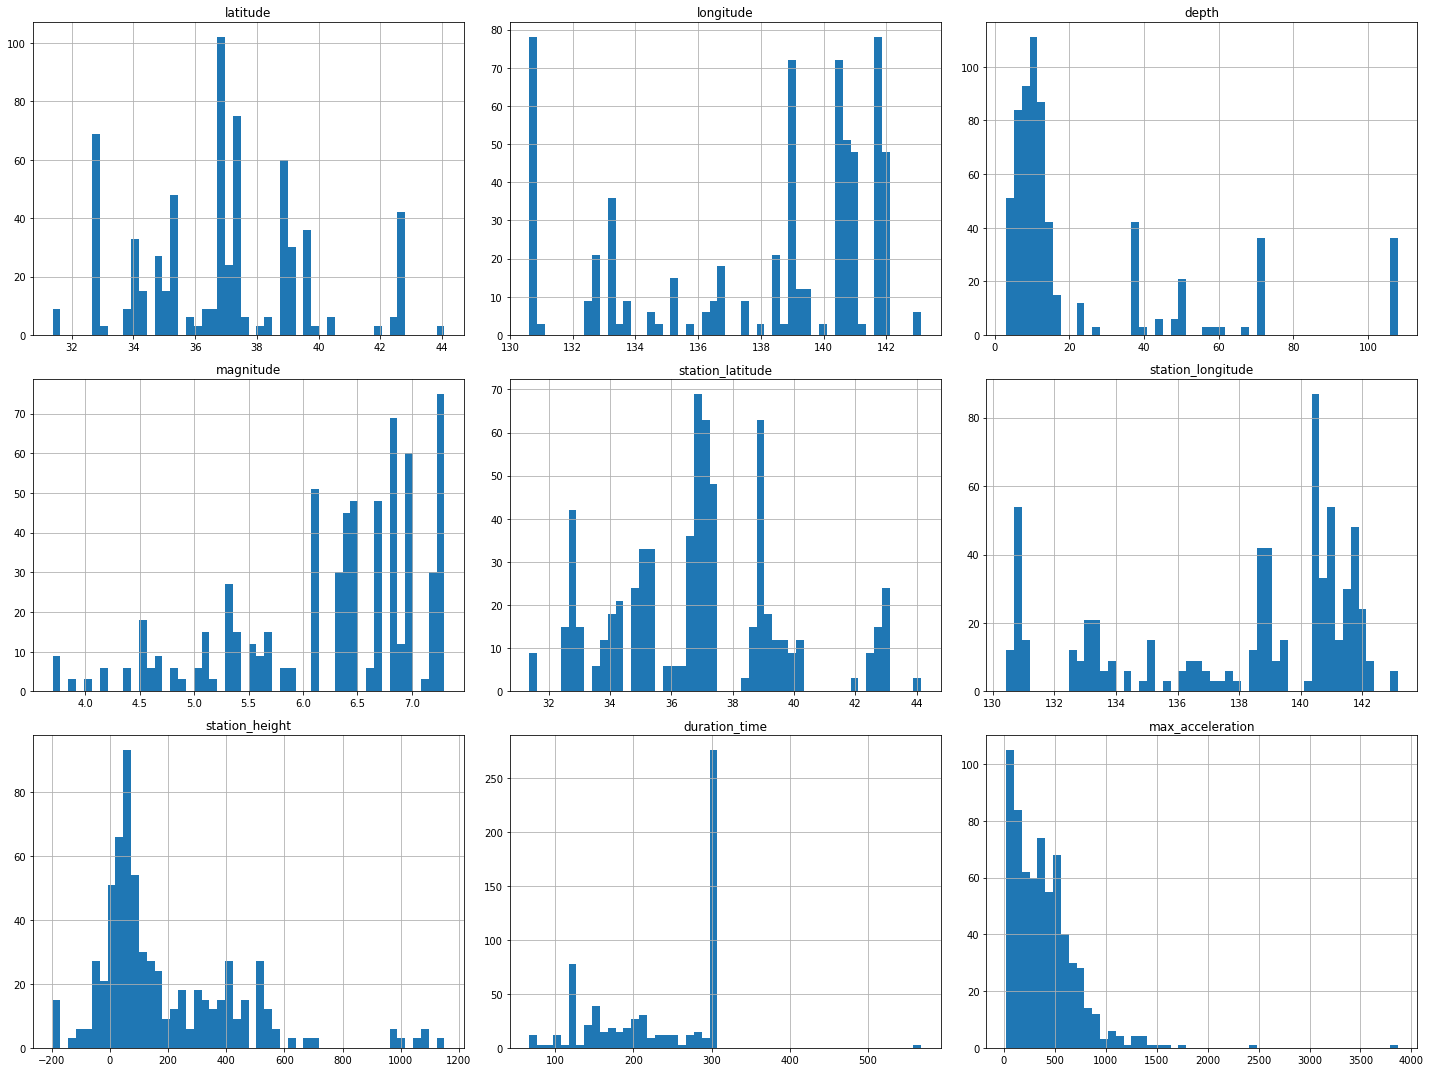

In [11]:
# we can also check the summary by plotting a histogram for all the attrs


# Where to save the figures
PROJECT_ROOT_DIR = "."
NAME = "kik_knet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

%matplotlib inline
import matplotlib.pyplot as plt
earthquake.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='station_longitude', ylabel='station_latitude'>

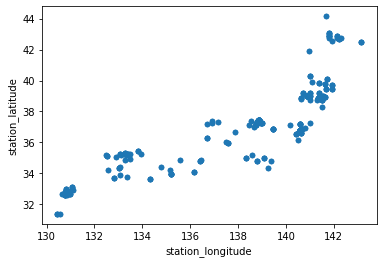

In [12]:
# view geolocation data
earthquake.plot(
    kind="scatter",
    x="station_longitude",
    y="station_latitude",
    alpha=1.0
)

Saving figure magnitude_acceration_scatterplot


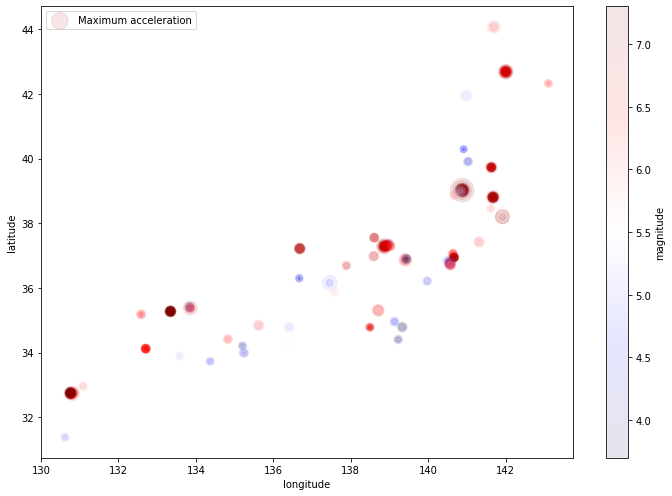

In [13]:
earthquake.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=earthquake['max_acceleration']/7, label="Maximum acceleration",
    figsize=(10,7), c="magnitude", cmap=plt.get_cmap('seismic'), colorbar=True,
    sharex=False)
plt.legend()
save_fig("magnitude_acceration_scatterplot")

Saving figure japan_magnitude_acceration_scatterplot


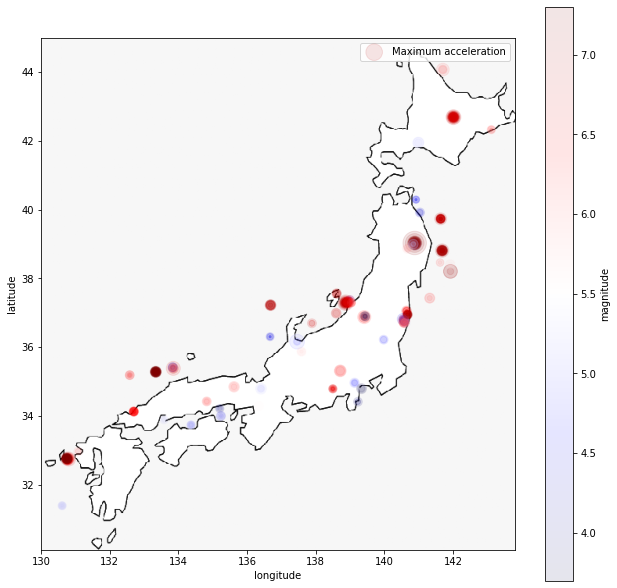

In [14]:
PROJECT_ROOT_DIR = "."
NAME = "kik_knet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)
filename = 'japan2.png'

import matplotlib.image as mpimg
japan_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
earthquake.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1,
    s=earthquake['max_acceleration']/7, label="Maximum acceleration",
    figsize=(9,8.5), c="magnitude", cmap=plt.get_cmap('seismic'), colorbar=True,
    sharex=False)

plt.imshow(japan_img, extent=[130, 143.8, 30.1, 45], alpha=1.0,
           cmap=plt.get_cmap("seismic"))
plt.legend()
save_fig("japan_magnitude_acceration_scatterplot")

# create and visualise near source and far source data

## far source example:
##### station: IWTH21
##### date: 2008/07/24 00:26:00
##### depth: 108km
##### magnitude: 6.8

## near source example:
##### station: TCGH07
##### date: 2012/12/17 18:48:00
##### depth: 3km
##### magnitude: 3.7

In [15]:
import math

def create_data(folder_path):
    all_files_data = []
    strong_motion_data = []
    for path, directories, files in os.walk(folder_path):
        for file in files:
            if 'ps' in file: continue
            file_path = f'{path}/{file}'
            file_data = get_file_data(file_path)
            scale_factor = (file_data['scale_factor']).split('(gal)/')
            file_data['scale_factor'] = float(int(scale_factor[0])/int(scale_factor[1]))
            all_files_data.append(file_data)

    fname = folder_path.split('/')[-1]
    fpath = f'{ALL_DATA_PATH}/{fname}.csv'

    attrs = [
        'time (s)',
        'NS1_data',
        # 'NS1_scale_factor',
        'EW1_data',
        # 'EW1_scale_factor',
        'UD1_data',
        # 'UD1_scale_factor',
        'NS2_data',
        # 'NS2_scale_factor',
        'EW2_data',
        # 'EW2_scale_factor',
        'UD2_data',
        # 'UD2_scale_factor',
    ]
    channel_map = {
        '1': 'NS1', '2': 'EW1', '3': 'UD1',
        '4': 'NS2', '5': 'EW2', '6': 'UD2'
    }
    zero, one, two, three, four, five = all_files_data
    sf_zero, cn_zero = zero['scale_factor'], zero['channel_number']
    sf_one, cn_one = one['scale_factor'], one['channel_number']
    sf_two, cn_two = two['scale_factor'], two['channel_number']
    sf_three, cn_three = three['scale_factor'], three['channel_number']
    sf_four, cn_four = four['scale_factor'], four['channel_number']
    sf_five, cn_five = five['scale_factor'], five['channel_number']

    freq = int(zero['sampling_frequency'].split('Hz')[0])

    for idx in range(len(zero['strong_motion_data'])):
        d = {
            'time (s)': float(idx/freq),
            f'{channel_map[cn_zero]}_data': int(zero['strong_motion_data'][idx]) * sf_zero,
            # f'{channel_map[cn_zero]}_scale_factor': sf_zero,
            f'{channel_map[cn_one]}_data': int(one['strong_motion_data'][idx]) * sf_one,
            # f'{channel_map[cn_one]}_scale_factor': sf_one,
            f'{channel_map[cn_two]}_data': int(two['strong_motion_data'][idx]) * sf_two,
            # f'{channel_map[cn_two]}_scale_factor': sf_two,
            f'{channel_map[cn_three]}_data': int(three['strong_motion_data'][idx]) * sf_three,
            # f'{channel_map[cn_three]}_scale_factor': sf_three,
            f'{channel_map[cn_four]}_data': int(four['strong_motion_data'][idx]) * sf_four,
            # f'{channel_map[cn_four]}_scale_factor': sf_four,
            f'{channel_map[cn_five]}_data': int(five['strong_motion_data'][idx]) * sf_five,
            # f'{channel_map[cn_five]}_scale_factor': sf_five,
        }
        strong_motion_data.append(d)

    create_csv(fpath, attrs, strong_motion_data)


folders = [
    f'{cwd + RAW_DATA_PATH}/IWTH210807240026',
    f'{cwd + RAW_DATA_PATH}/TCGH071212171848',
    f'{cwd + RAW_DATA_PATH}/TKCH081208252316',
]
# for f in folders:
#     create_data(f)

In [16]:
# load far source data
tkch_far_source = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/TKCH081208252316.csv')
tkch_far_source.head()

/home/adebowale/code/proj/kik_knet_data/all_data/TKCH081208252316.csv


,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data
0,0.00,13.281834,8.781019,-3.577876,-19.929691,-4.092279,-17.591972
1,0.01,13.281834,8.780543,-3.577399,-19.930327,-4.094820,-17.589431
2,0.02,13.282787,8.781496,-3.575970,-19.930327,-4.097996,-17.588161
3,0.03,13.282310,8.780543,-3.576923,-19.929056,-4.096726,-17.588796
4,0.04,13.280881,8.779113,-3.577399,-19.927786,-4.094185,-17.590702


In [17]:
tkch_far_source.tail()

,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data
16595,165.95,13.309946,8.744330,-3.565487,-19.953196,-4.209800,-17.575456
16596,165.96,13.305658,8.743854,-3.564534,-20.016085,-4.193919,-17.579267
16597,165.97,13.296605,8.740519,-3.564058,-20.069446,-4.172956,-17.586255
16598,165.98,13.288981,8.740519,-3.560246,-20.104385,-4.151357,-17.588796
16599,165.99,13.287551,8.746236,-3.553575,-20.122172,-4.134841,-17.580538


Saving figure tkch08_far_source


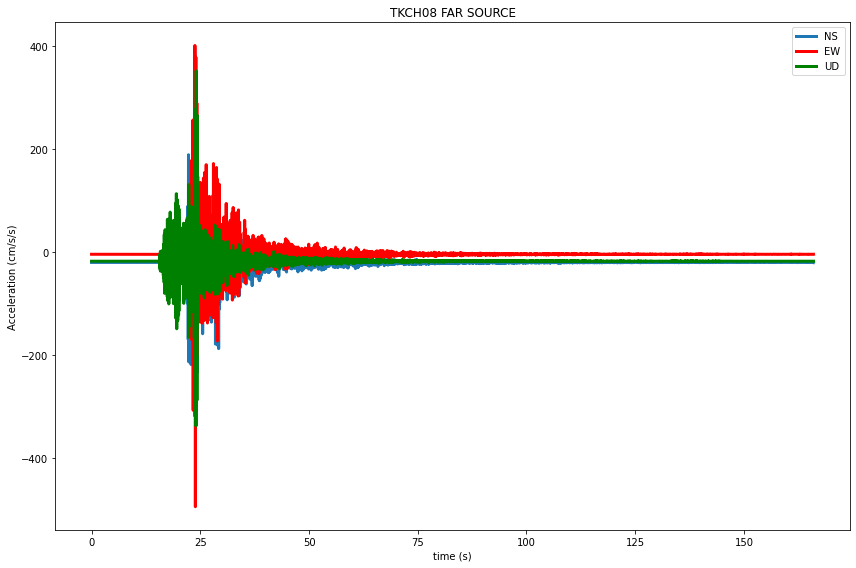

In [18]:
fig = plt.figure(figsize=(12, 8))
plt.plot(tkch_far_source['time (s)'], tkch_far_source['NS2_data'], label='NS', linewidth=3)
plt.plot(tkch_far_source['time (s)'], tkch_far_source['EW2_data'], label='EW', linewidth=3, color='red')
plt.plot(tkch_far_source['time (s)'], tkch_far_source['UD2_data'], label='UD', linewidth=3, color='green')
# Add title and labels
plt.title('TKCH08 FAR SOURCE')
plt.xlabel('time (s)')
plt.ylabel('Acceleration (cm/s/s)')
plt.legend()
plt.tight_layout()
save_fig("tkch08_far_source")
plt.show()

Saving figure tkch08_far_source_15to16


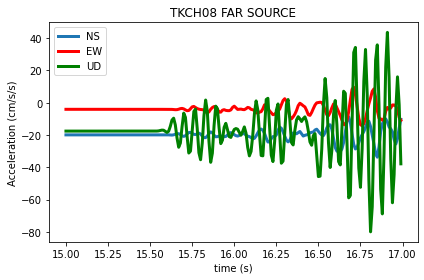

In [19]:
tkch_range = tkch_far_source.loc[(tkch_far_source['time (s)'] >= 15) & (tkch_far_source['time (s)'] < 17)]
# fig = plt.figure(figsize=(12, 8))
plt.plot(tkch_range['time (s)'], tkch_range['NS2_data'], label='NS', linewidth=3)
plt.plot(tkch_range['time (s)'], tkch_range['EW2_data'], label='EW', linewidth=3, color='red')
plt.plot(tkch_range['time (s)'], tkch_range['UD2_data'], label='UD', linewidth=3, color='green')
# Add title and labels
plt.title('TKCH08 FAR SOURCE')
plt.xlabel('time (s)')
plt.ylabel('Acceleration (cm/s/s)')
plt.legend()
plt.tight_layout()
save_fig("tkch08_far_source_15to16")
plt.show()

In [20]:
# load near source data
tcgh_near_source = load_kiknet_data(f'{cwd}{ALL_DATA_PATH}/TCGH071212171848.csv')
tcgh_near_source.head()

/home/adebowale/code/proj/kik_knet_data/all_data/TCGH071212171848.csv


,time (s),NS1_data,EW1_data,UD1_data,NS2_data,EW2_data,UD2_data
0,0.00,87.323709,74.728957,40.898042,14.116521,5.246528,10.324715
1,0.01,87.323709,74.729433,40.897089,14.119062,5.242081,10.325350
2,0.02,87.323232,74.729433,40.897089,14.120332,5.242716,10.327891
3,0.03,87.323232,74.729433,40.898042,14.115250,5.246528,10.329161
4,0.04,87.323232,74.729433,40.898042,14.108262,5.249704,10.327891


Saving figure tcgh07_near_source


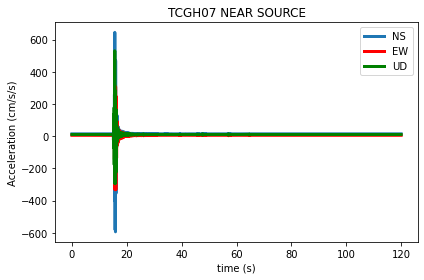

In [21]:
# fig = plt.figure(figsize=(12, 8))
plt.plot(tcgh_near_source['time (s)'], tcgh_near_source['NS2_data'], label='NS', linewidth=3)
plt.plot(tcgh_near_source['time (s)'], tcgh_near_source['EW2_data'], label='EW', linewidth=3, color='red')
plt.plot(tcgh_near_source['time (s)'], tcgh_near_source['UD2_data'], label='UD', linewidth=3, color='green')
# Add title and labels
plt.title('TCGH07 NEAR SOURCE')
plt.xlabel('time (s)')
plt.ylabel('Acceleration (cm/s/s)')
plt.legend()
plt.tight_layout()
save_fig("tcgh07_near_source")
plt.show()

Saving figure tcgh07_near_source_15to17


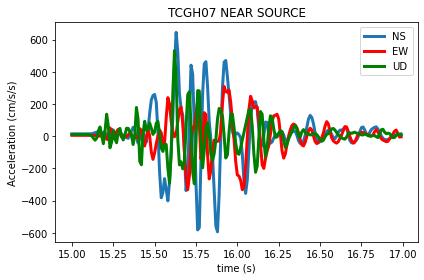

In [22]:
tcgh_range = tcgh_near_source.loc[(tcgh_near_source['time (s)'] >= 15) & (tcgh_near_source['time (s)'] < 17)]
# fig = plt.figure(figsize=(12, 8))
plt.plot(tcgh_range['time (s)'], tcgh_range['NS2_data'], label='NS', linewidth=3)
plt.plot(tcgh_range['time (s)'], tcgh_range['EW2_data'], label='EW', linewidth=3, color='red')
plt.plot(tcgh_range['time (s)'], tcgh_range['UD2_data'], label='UD', linewidth=3, color='green')
# Add title and labels
plt.title('TCGH07 NEAR SOURCE')
plt.xlabel('time (s)')
plt.ylabel('Acceleration (cm/s/s)')
plt.legend()
plt.tight_layout()
save_fig("tcgh07_near_source_15to17")
plt.show()

# normalise the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

tcgh_range = tcgh_near_source.loc[(tcgh_near_source['time (s)'] >= 15) & (tcgh_near_source['time (s)'] < 16)]
tkch_range = tkch_far_source.loc[(tkch_far_source['time (s)'] >= 15) & (tkch_far_source['time (s)'] < 16)]
def scaler(col_data, _range):
    scaler = MinMaxScaler(feature_range=_range)
    return scaler.fit_transform(col_data)

r = (-1, 1)
tcgh_range[['NormNS2', 'NormEW2', 'NormUD2']] = scaler(tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']], r)
tkch_range[['NormNS2', 'NormEW2', 'NormUD2']] = scaler(tkch_range[['NS2_data', 'EW2_data', 'UD2_data']], r)

/tmp/ipykernel_4099/2049793031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range[['NormNS2', 'NormEW2', 'NormUD2']] = scaler(tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']], r)
/tmp/ipykernel_4099/2049793031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range[['NormNS2', 'NormEW2', 'NormUD2']] = scaler(tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']], r)
/tmp/ipykernel_4099/2049793031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [24]:
import numpy as np
r = (0, 1)
tcgh_range[['AbsNS2', 'AbsEW2', 'AbsUD2']] = scaler(np.abs(tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)
tkch_range[['AbsNS2', 'AbsEW2', 'AbsUD2']] = scaler(np.abs(tkch_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)

/tmp/ipykernel_4099/303332139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range[['AbsNS2', 'AbsEW2', 'AbsUD2']] = scaler(np.abs(tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)
/tmp/ipykernel_4099/303332139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range[['AbsNS2', 'AbsEW2', 'AbsUD2']] = scaler(np.abs(tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)
/tmp/ipykernel_4099/303332139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [28]:
import numpy as np
r = (0, 1)
tcgh_range['CumNS2'] = np.cumsum(tcgh_range['AbsNS2'])
tcgh_range['CumEW2'] = np.cumsum(tcgh_range['AbsEW2'])
tcgh_range['CumUD2'] = np.cumsum(tcgh_range['AbsUD2'])

tkch_range['CumNS2'] = np.cumsum(tkch_range['AbsNS2'])
tkch_range['CumEW2'] = np.cumsum(tkch_range['AbsEW2'])
tkch_range['CumUD2'] = np.cumsum(tkch_range['AbsUD2'])

tcgh_range[['CumNS2', 'CumEW2', 'CumUD2']] = scaler(tcgh_range[['CumNS2', 'CumEW2', 'CumUD2']], r)
tkch_range[['CumNS2', 'CumEW2', 'CumUD2']] = scaler(tkch_range[['CumNS2', 'CumEW2', 'CumUD2']], r)

/tmp/ipykernel_4099/239911893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range['CumNS2'] = np.cumsum(tcgh_range['AbsNS2'])
/tmp/ipykernel_4099/239911893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range['CumEW2'] = np.cumsum(tcgh_range['AbsEW2'])
/tmp/ipykernel_4099/239911893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [29]:
import numpy as np
import scipy.signal
# https://swharden.com/blog/2020-09-23-signal-filtering-in-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# https://www.earthinversion.com/techniques/Time-Series-Analysis-Filtering-or-smoothing-data/
b, a = scipy.signal.butter(3, [.01, .05], 'band')
r = (0, 1)
tcgh_range[['FiltNS2', 'FiltEW2', 'FiltUD2']] = scaler(scipy.signal.lfilter(b, a, tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)
tkch_range[['FiltNS2', 'FiltEW2', 'FiltUD2']] = scaler(scipy.signal.lfilter(b, a, tkch_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)

/tmp/ipykernel_4099/2912990953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgh_range[['FiltNS2', 'FiltEW2', 'FiltUD2']] = scaler(scipy.signal.lfilter(b, a, tcgh_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)
/tmp/ipykernel_4099/2912990953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tkch_range[['FiltNS2', 'FiltEW2', 'FiltUD2']] = scaler(scipy.signal.lfilter(b, a, tkch_range[['NS2_data', 'EW2_data', 'UD2_data']]), r)


Saving figure near_far:source_all_grid


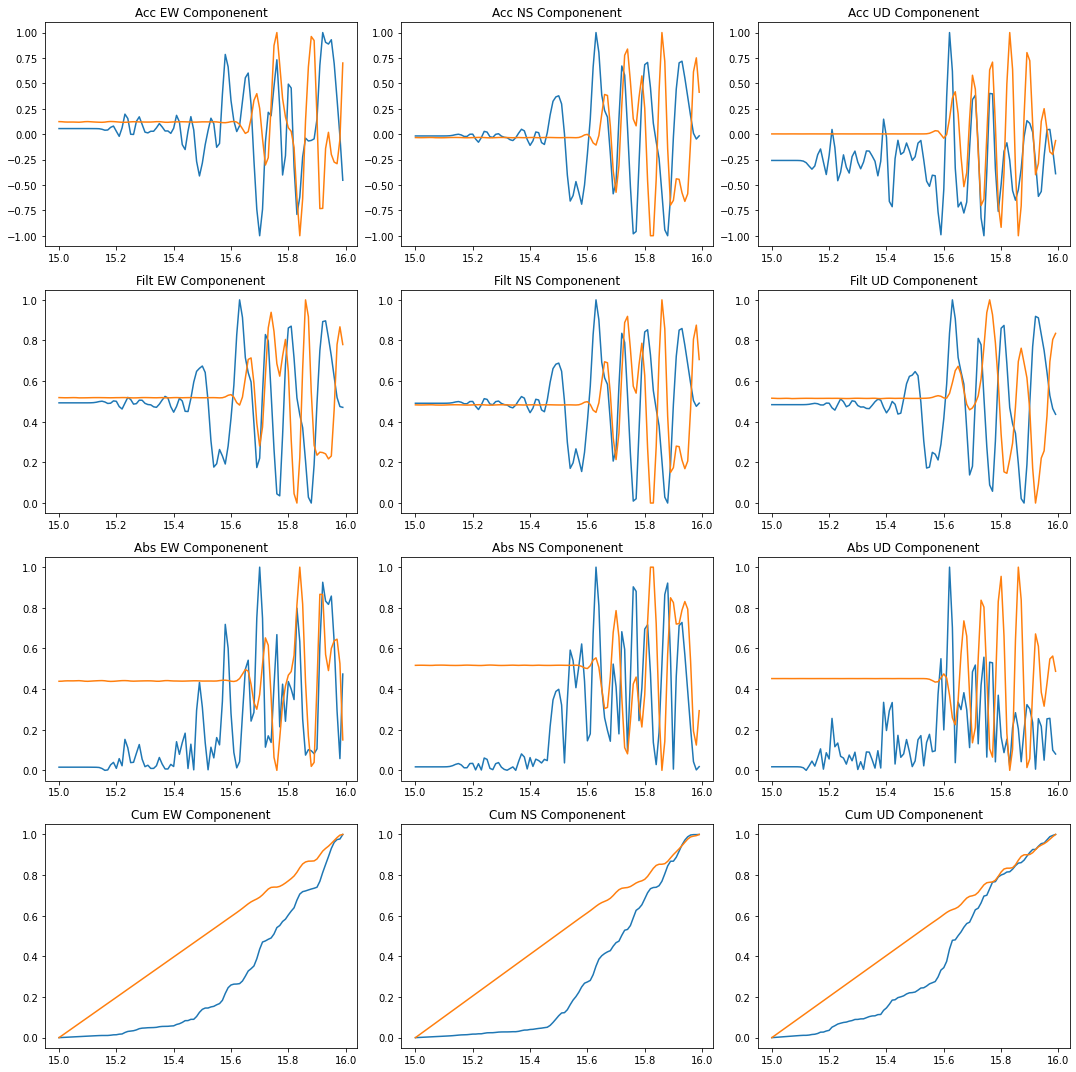

In [30]:
# tcgh_range = tcgh_near_source.loc[(tcgh_near_source['time (s)'] >= 15) & (tcgh_near_source['time (s)'] < 16)]
# tkch_range = tkch_far_source.loc[(tkch_far_source['time (s)'] >= 15) & (tkch_far_source['time (s)'] < 16)]

#
figure, axis = plt.subplots(4, 3, figsize=(15,15))
#

#acceleration
axis[0, 0].plot(tcgh_range['time (s)'], tcgh_range['NormEW2'])
axis[0, 0].plot(tkch_range['time (s)'], tkch_range['NormEW2'])
axis[0, 0].set_title("Acc EW Componenent")


axis[0, 1].plot(tcgh_range['time (s)'], tcgh_range['NormNS2'])
axis[0, 1].plot(tkch_range['time (s)'], tkch_range['NormNS2'])
axis[0, 1].set_title("Acc NS Componenent")

axis[0, 2].plot(tcgh_range['time (s)'], tcgh_range['NormUD2'])
axis[0, 2].plot(tkch_range['time (s)'], tkch_range['NormUD2'])
axis[0, 2].set_title("Acc UD Componenent")

# filtered acceleration
axis[1, 0].plot(tcgh_range['time (s)'], tcgh_range['FiltEW2'])
axis[1, 0].plot(tkch_range['time (s)'], tkch_range['FiltEW2'])
axis[1, 0].set_title("Filt EW Componenent")

axis[1, 1].plot(tcgh_range['time (s)'], tcgh_range['FiltNS2'])
axis[1, 1].plot(tkch_range['time (s)'], tkch_range['FiltNS2'])
axis[1, 1].set_title("Filt NS Componenent")

axis[1, 2].plot(tcgh_range['time (s)'], tcgh_range['FiltUD2'])
axis[1, 2].plot(tkch_range['time (s)'], tkch_range['FiltUD2'])
axis[1, 2].set_title("Filt UD Componenent")

# absolute acceleration
axis[2, 0].plot(tcgh_range['time (s)'], tcgh_range['AbsEW2'])
axis[2, 0].plot(tkch_range['time (s)'], tkch_range['AbsEW2'])
axis[2, 0].set_title("Abs EW Componenent")

axis[2, 1].plot(tcgh_range['time (s)'], tcgh_range['AbsNS2'])
axis[2, 1].plot(tkch_range['time (s)'], tkch_range['AbsNS2'])
axis[2, 1].set_title("Abs NS Componenent")

axis[2, 2].plot(tcgh_range['time (s)'], tcgh_range['AbsUD2'])
axis[2, 2].plot(tkch_range['time (s)'], tkch_range['AbsUD2'])
axis[2, 2].set_title("Abs UD Componenent")

# cummulative acceleration
axis[3, 0].plot(tcgh_range['time (s)'], tcgh_range['CumEW2'])
axis[3, 0].plot(tkch_range['time (s)'], tkch_range['CumEW2'])
axis[3, 0].set_title("Cum EW Componenent")

axis[3, 1].plot(tcgh_range['time (s)'], tcgh_range['CumNS2'])
axis[3, 1].plot(tkch_range['time (s)'], tkch_range['CumNS2'])
axis[3, 1].set_title("Cum NS Componenent")

axis[3, 2].plot(tcgh_range['time (s)'], tcgh_range['CumUD2'])
axis[3, 2].plot(tkch_range['time (s)'], tkch_range['CumUD2'])
axis[3, 2].set_title("Cum UD Componenent")

save_fig("near_far:source_all_grid")
plt.show()
